# Gradient descent algorithm

initiate  weight:
 1
initiate  bias:
 1
9.309076844385751e-17

 (1.791759382591438, -2.282174004225267)


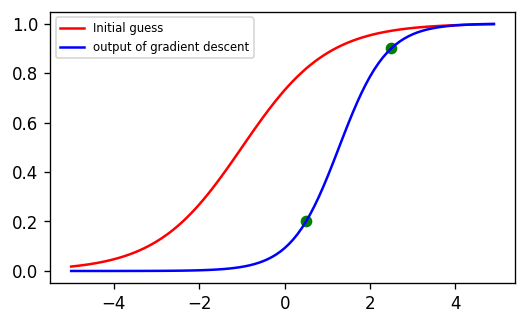

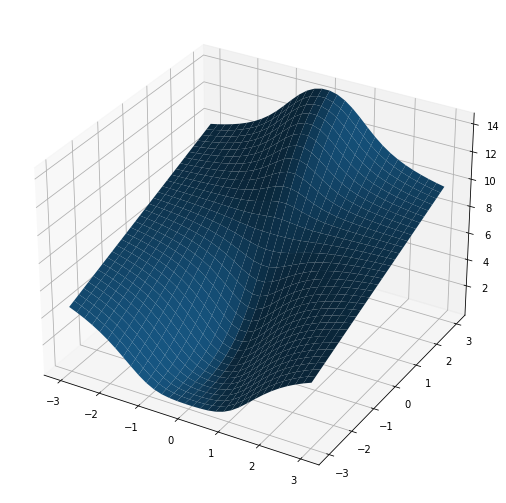

In [16]:
import numpy as np
import matplotlib.pyplot as plt
X = [0.5, 2.5]
Y = [0.2, 0.9]
pt=np.arange(-5,5,0.1)


def f(w,b,x): #sigmoid with parameters w,b
    return 1.0 / (1.0 +np.exp(-(w*x + b)))

def error (w,b) :
    err =0.0
    for x,y in zip(X,Y) :
        fx = f(w,b,x)
        err += 0.5* (fx-y)**2
    return err

def grad_b(w,b,x,y) :
    fx = f(w,b,x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w,b,x,y) :
    fx = f(w,b,x)
    return (fx -y) * fx * (1 - fx) * x

def do_gradient_descent():
    w=float(input('initiate  weight:\n '))
    b=float(input('initiate  bias:\n '))
    eta, max_epochs =  1.0, 1000
    plt.figure(figsize=(5,3), dpi=120)
    plt.plot(pt,1.0 / (1.0 +np.exp(-(w*pt+b))),label='Initial guess',color='red')
     
    for i in range(max_epochs):
        dw, db =0,0
        for x,y in zip(X, Y) :
            dw += grad_w(w, b,x,y)
            db += grad_b(w, b,x,y)
            w = w - eta * dw  
            b = b - eta * db

    print(error(w,b))
    print('\n',(w,b))
    y_pred=[f(w,b,X[0]),f(w,b,X[1])]
    plt.plot(pt,1.0 / (1.0 +np.exp(-(w*pt + b))),label='output of gradient descent',color='blue')
    plt.scatter(X, Y, color='green')
    plt.legend(fontsize="x-small")
    plt.show
do_gradient_descent()




#error surface






def f1(x): #sigmoid with parameters w,b
    return 1.0 / (1.0 +np.exp(-(1.79*x + -2.282)))
l=list(map(f1,pt))
# Creating dataset
w = np.outer(np.linspace(-3, 3, 32), np.ones(32))
b = w.copy().T # transpose
x=np.outer(np.linspace(-3, 3, 32), np.ones(32))
def error1 (w,b) :
    err =0.0
    for i,j in zip(x,l) :
        fx = f(w,b,i)
        err += 0.5* (fx-j)**2
    return err
z = error1 (w,b)
  
# Creating figyre
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
  
# Creating plot
ax.plot_surface(w, b, z)
  
# show plot
plt.show()

# Momentum Gradient descent algorithm

In [2]:
def do_momentum_gradient_descent():
    w ,b ,eta = init_w, init_b ,1.0
    prev_v_w, prev_v_b, gamma = 0 ,0, 0.9
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x,y)
            db += grad_b(w ,b, x,y)

        v_w = gamma * prev_v_w + eta* dw    
        v_b = gamma * prev_v_b + eta* db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b     
        

# Nesterov accelerated gradient descent algorithm

In [3]:
def do_nesterov_gradient_descent():
    w ,b ,eta = init_w, init_b ,1.0
    prev_v_w, prev_v_b, gamma = 0 ,0, 0.9
    for i in range(max_epochs):
        dw , db =0 , 0
        #do partial updates
        v_w = gamma * prev_v_w    
        v_b = gamma * prev_v_b
        for x,y in zip(X, Y):
            dw += grad_w(w - v_w ,b - v_b, x,y)
            db += grad_b(w - v_w ,b - v_b, x,y)

        #now do the full update
        v_w = gamma * prev_v_w + eta* dw    
        v_b = gamma * prev_v_b + eta* db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b     

# Stochastic gradient descent algorithm

In [4]:
def do_momentum_gradient_descent():
    w ,b ,eta , max_epochs = 2, 2, 1.0, 1000
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw = grad_w(w ,b, x,y)
            db = grad_b(w ,b, x,y)
            w = w - eta*dw
            b = b - eta*db
          

# Stochastic momentum gradient descent

In [5]:
def do_stochastic_momentum_gradient_descent():
    w ,b ,eta = init_w, init_b ,1.0
    prev_v_w, prev_v_b, gamma = 0 ,0, 0.9
    for i in range(max_epochs):
        dw , db = 0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x, y)
            db += grad_b(w ,b, x, y)

        v_w = gamma * prev_v_w + eta* dw    
        v_b = gamma * prev_v_b + eta* db
        w = w - v_w
        b = b - v_b
        prev_v_w = v_w
        prev_v_b = v_b     

# Line search gradient descent

In [6]:
def do_line_search_gradient_descent():
    w ,b ,etas = init_w, init_b ,[0.1,0.5,1.0,5.0,10.0]
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x,y)
            db += grad_b(w ,b, x,y)
        min_error = 10000 #some large value
        best_w, best_b = w, b
        for eta in etas:
            temp_w = w + eta* dw    
            temp_b = b + eta* db
            if error(temp_w, temp_b)< min_error:
                best_w = temp_w
                best_b = temp_b
                min_error = error(temp_w, temp_b)
        w,b = best_w , best_b       

# rmsprop algorithem

In [7]:
def do_rmsprop():
    w ,b ,eta = init_w, init_b ,0.1
    v_w, v_b, eps, beta1= 0, 0, 1e-8, 0.9
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x,y)
            db += grad_b(w ,b, x,y)

        v_w = beta1 * v_w + (1 - beta1)*dw**2   
        v_b = beta1 * v_b + (1 - beta1)*db**2
        w = w - (eta/np.sqrt(v_w + eps))*dw 
        b = b - (eta/np.sqrt(v_b + eps))*db

# adagrad

In [8]:
def do_adagrad():
    w ,b ,eta = init_w, init_b ,0.1
    v_w, v_b, eps = 0 ,0, 1e-8
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x,y)
            db += grad_b(w ,b, x,y)

        v_w = v_w + dw**2   
        v_b = v_b + db**2
        w = w - (ets/np.sqrt(v_w + eps))
        b = b - (eta/np.sqrt(v_b + eps))
        

# adam

In [9]:
def do_adam():
    w_b_dw_db = [( init_w, init_b ,0,0)]
    w_history, b_history, error_history = [],[],[],[]
    w, b, eta, mini_batch_size, num_points_seen = init_w, init_, 0.1, 10, 0
    m_w, m_b, v_w, v_b, m_w_hat, m_b_hat, v_w_hat, v_b_hat, eps, beta1, beta2 = 0,0,0,0,0,0,0,0,1e-8, 0.9, 0.999 
    for i in range(max_epochs):
        dw , db =0 , 0
        for x,y in zip(X, Y):
            dw += grad_w(w ,b, x,y)
            db += grad_b(w ,b, x,y)

        m_w = beta1 * m_w + (1-beta1)* dw    
        m_b = beta1 * m_b + (1-beta2)* db
        
        v_w = beta2 * v_w + (1-beta2)* dw**2   
        v_b = beta2 * v_b + (1-beta2)* db**2
        
        m_w_hat = m_w/(1-math.pow(beta1,i+1))
        m_b_hat = m_b/(1-math.pow(beta1,i+1))
        
        v_w_hat = v_w/(1-math.pow(beta2,i+1))
        v_b_hat = v_b/(1-math.pow(beta2,i+1)) 
       
        w = w -( eta/np.sqrt(v_w_hat + eps))+ m_w_hat
        b = b -( eta/np.sqrt(v_b_hat + eps))+ m_b_hat
          